All the models will be regression models:

1. PD : Logistic regression
2. LGD: Beta regression 
3. EAD : Beta regression 

For PD Model: feature (independent var) is LOAN STATUS, 
FOR LGD Model: how much loan was recovered after the borrower had defaulted contained in *RECOVERY* column.
For EAD : we calculate total exposure at the moment the borrower defaulted, Vs Total exposure in the past, to be found in TOTAL_recovered_principa Column.

For discrete & continuous variables we will have different types of pre-processing.

**Distinctive feature of PD Model**: All the independednt var should be categorical, hence pre-processing will do so for PD Model to form Dummy Var for continuous features of PD model. We may combine features for DIMENSION REDUCTION for the model.

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_backup = pd.read_csv("loan.csv",low_memory=False)

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [5]:
#to display all columns
pd.options.display.max_columns = None

In [6]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,

In [7]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [8]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [9]:
# to get info of data types of the columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

### GENERAL PRE-PROCESSING

#### Preprocessing few continuous numeric values

In [10]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('nan', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [15]:
loan_data['earliest_cr_line']

0         Jan-1985
1         Apr-1999
2         Nov-2001
3         Feb-1996
4         Jan-1996
            ...   
887374    Sep-2004
887375    Mar-1974
887376    Sep-2003
887377    Oct-2003
887378    Dec-2001
Name: earliest_cr_line, Length: 887379, dtype: object

In [16]:
# for this we will calculate Mopnths passed since earliest credit line issued

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)

In [18]:
loan_data['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
887374   2004-09-01
887375   1974-03-01
887376   2003-09-01
887377   2003-10-01
887378   2001-12-01
Name: earliest_cr_line_date, Length: 887379, dtype: datetime64[ns]

In [19]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
887374    4839 days
887375   15981 days
887376    5205 days
887377    5175 days
887378    5844 days
Name: earliest_cr_line_date, Length: 887379, dtype: timedelta64[ns]

In [21]:
# Now getting Months from upper operation
loan_data['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/ np.timedelta64(1,'M')))

In [22]:
loan_data['months_since_earliest_cr_line'].describe()

count    887350.000000
mean        236.841713
std          89.242280
min          61.000000
25%         175.000000
50%         219.000000
75%         282.000000
max         887.000000
Name: months_since_earliest_cr_line, dtype: float64

In [23]:
loan_data.rename(columns = {'months_since_earliest_cr_line':'mths_since_earliest_cr_line'}, inplace = True) 

**SUPPOSE if min(loan_data['months_since_earliest_cr_line']) is negative** in nature you can use

loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line']<0] = loan_data['months_since_earliest_cr_line'].max()
to replace negative values with maximum or minimum OR Average values

### HOMEWORK

your task is to preprocess the ‘term’ variable and the ‘issue_d’ variable, similarly to the ‘employment length’ variable and the ‘earliest credit line variable’ we preprocessed in the last lecture.

1. From the variable ‘term’, which is of object (text string) data type, create a new variable, named ‘term_int’, which is numeric and contains the term of the loan in months.

Tips: First remove the unnecessary text from each row; then, turn what remains into a numeric variable.

2. From the variable ‘issue date’ (‘issue_d’), which is of object (text string) data type, create a new variable, named ‘mths_since_issue_d’ (‘months since issue date’).

Tips: First turn the test strings into dates; then calculate the difference between December 1st 2017 and each of the issue dates, in months; finally, check if the values make sense.

#### Working on ['term'] column

In [24]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')

In [26]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [27]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [28]:
type(loan_data['term_int'][0])

numpy.int64

#### Working on ['issue date'] column

In [29]:
loan_data['issue_d']

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
            ...   
887374    Jan-2015
887375    Jan-2015
887376    Jan-2015
887377    Jan-2015
887378    Jan-2015
Name: issue_d, Length: 887379, dtype: object

In [30]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)

In [31]:
loan_data['issue_date']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: issue_date, Length: 887379, dtype: datetime64[ns]

In [32]:
# Now getting Months for issue date
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_date'])/ np.timedelta64(1,'M')))

In [33]:
loan_data['mths_since_issue_d'].describe()

count    887379.000000
mean         40.715460
std          15.386312
min          24.000000
25%          29.000000
50%          37.000000
75%          48.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### HOMEWORK complete

### Preprocessing few discrete variables

In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 80 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

**We want tocreate dummy features for allcategories of the discrete features**

they will be binary indicators and  = 1 if belong to category else 0

We will need onlt [k-1] dummy var to represent info of [k] vars

In [35]:
# function will create columns will same names as categories in the column with given prefix & spearator
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
887374,0,1,0,0,0,0,0
887375,0,1,0,0,0,0,0
887376,0,0,0,1,0,0,0
887377,0,0,0,0,1,0,0


In [36]:
# we do this for all categorical variables & join them to form one data frame
loan_data_dummies = [
    pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
    pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
    pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
    pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
    pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
    pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
    pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')
    
]

In [37]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [38]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [39]:
# merging both datasets by column arrangements
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
loan_data.columns.unique()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=208)

### Cleaning & checking for missing values

We will focus on useful variables only

In [41]:
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [42]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           51462
emp_length                                                          44825
home_ownership                                                          0
annual_inc                            

In [43]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True )

In [44]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

### Homework

Here are the instructions about what values to replace the missing values with for the remaining variables.

1. For annual income (‘annual_inc’), replace the missing values with the mean of the non-missing values of the variable.

2. For all of the following variables, replace the missing values with zeroes:

‘mths_since_earliest_cr_line’

‘acc_now_delinq’

‘total_acc’

‘pub_rec’

‘open_acc’

‘inq_last_6mths’

‘delinq_2yrs’

‘emp_length_int’

In [45]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True )

In [46]:
loan_data['annual_inc'].isnull().sum()

0

In [47]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True )
loan_data['acc_now_delinq'].fillna(0, inplace = True )
loan_data['total_acc'].fillna(0, inplace = True )
loan_data['pub_rec'].fillna(0, inplace = True )
loan_data['open_acc'].fillna(0, inplace = True )
loan_data['inq_last_6mths'].fillna(0, inplace = True )
loan_data['delinq_2yrs'].fillna(0, inplace = True )
loan_data['emp_length_int'].fillna(0, inplace = True )

In [48]:
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           51462
emp_length                                                          44825
home_ownership                                                          0
annual_inc                            

Homework completed

# PD Model

### Data preparation

Now we will define a definition of, Default [0] & Non-default loans[1]. It will be a logistic regression model.

All dummy variables are caategorical in nature to maintain the interpritability of the model. We will be including the dummy variables in the model.

We will be converting the Continuous values to Categorical values too.

We will not be using INFORMATION value for feature selection but will be calculating it.

Feature selection will be from advanced methods.

### Data preparation

In [49]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [50]:
loan_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [51]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
Name: loan_status, dtype: float64

In [52]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Late (31-120 days)',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                               'Default']), 0, 1)

In [53]:
loan_data['good_bad'].value_counts() / loan_data['good_bad'].count()

1    0.933716
0    0.066284
Name: good_bad, dtype: float64

### SPLITTING DATA

Our main moto is to avoid OVERFIITING, by dividing model into TRAIN & TEST sets.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size = 0.2, random_state = 43)

In [56]:
loan_data_inputs_train.shape

(709903, 208)

In [57]:
loan_data_inputs_test.shape

(177476, 208)

In [58]:
loan_data_targets_train.shape

(709903,)

In [59]:
loan_data_targets_test.shape

(177476,)

### Data prep : An example

In [60]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [61]:
df_inputs_prepr['grade'].unique()

array(['E', 'C', 'B', 'A', 'D', 'G', 'F'], dtype=object)

**As you may have guesses, here we are going to find weight of evidence for GRADE categorical attribute AS explained in the video**

In [62]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
215587,E,1
656800,C,1
424406,B,1
690864,C,1
352599,C,1


In [63]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,118531
1,B,203767
2,C,196687
3,D,111644
4,E,56464
5,F,18417
6,G,4393


In [64]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.978563
1,B,0.954257
2,C,0.932756
3,D,0.900595
4,E,0.879817
5,F,0.832383
6,G,0.792397


In [65]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(), 
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [66]:
df1

,grade,good_bad,grade,good_bad
0,A,118531,A,0.978563
1,B,203767,B,0.954257
2,C,196687,C,0.932756
3,D,111644,D,0.900595
4,E,56464,E,0.879817
5,F,18417,F,0.832383
6,G,4393,G,0.792397


In [67]:
df1 = df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,118531,0.978563
1,B,203767,0.954257
2,C,196687,0.932756
3,D,111644,0.900595
4,E,56464,0.879817
5,F,18417,0.832383
6,G,4393,0.792397


In [68]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [69]:
df1

,grade,n_obs,prop_good
0,A,118531,0.978563
1,B,203767,0.954257
2,C,196687,0.932756
3,D,111644,0.900595
4,E,56464,0.879817
5,F,18417,0.832383
6,G,4393,0.792397


In [70]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [71]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,118531,0.978563,0.166968
1,B,203767,0.954257,0.287035
2,C,196687,0.932756,0.277062
3,D,111644,0.900595,0.157267
4,E,56464,0.879817,0.079538
5,F,18417,0.832383,0.025943
6,G,4393,0.792397,0.006188


In [72]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good'])* df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,118531,0.978563,0.166968,115990.0,2541.0
1,B,203767,0.954257,0.287035,194446.0,9321.0
2,C,196687,0.932756,0.277062,183461.0,13226.0
3,D,111644,0.900595,0.157267,100546.0,11098.0
4,E,56464,0.879817,0.079538,49678.0,6786.0
5,F,18417,0.832383,0.025943,15330.0,3087.0
6,G,4393,0.792397,0.006188,3481.0,912.0


In [73]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097
1,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442
2,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273
4,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472
5,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721
6,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416


In [74]:
df1['Woe'] = np.log(df1['prop_n_good']/ df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe
0,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097,1.173804
1,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442,0.390743
2,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578,-0.017325
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273,-0.443292
4,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472,-0.656442
5,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721,-1.044530
6,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416,-1.307707


In [75]:
df1 = df1.sort_values(['Woe'])
df1 = df1.reset_index(drop = 'true')
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe
0,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416,-1.307707
1,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721,-1.044530
2,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472,-0.656442
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273,-0.443292
4,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578,-0.017325
5,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442,0.390743
6,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097,1.173804


In [76]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_Woe'] = df1['Woe'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe,diff_prop_good,diff_Woe
0,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416,-1.307707,NaN,NaN
1,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721,-1.044530,0.039986,0.263177
2,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472,-0.656442,0.047434,0.388089
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273,-0.443292,0.020778,0.213150
4,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578,-0.017325,0.032161,0.425967
5,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442,0.390743,0.021500,0.408067
6,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097,1.173804,0.024306,0.783062


**Finally, calculate the INFORMATION VALUE of each**

In [77]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['Woe']
df1['IV']  = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe,diff_prop_good,diff_Woe,IV
0,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416,-1.307707,NaN,NaN,0.325197
1,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721,-1.044530,0.039986,0.263177,0.325197
2,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472,-0.656442,0.047434,0.388089,0.325197
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273,-0.443292,0.020778,0.213150,0.325197
4,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578,-0.017325,0.032161,0.425967,0.325197
5,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442,0.390743,0.021500,0.408067,0.325197
6,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097,1.173804,0.024306,0.783062,0.325197


### Pre-processing discrete variables : Automating Calculations

In [78]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(), 
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['Woe'] = np.log(df['prop_n_good']/ df['prop_n_bad'])
    df = df.sort_values(['Woe'])
    df = df.reset_index(drop = 'true')
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_Woe'] = df['Woe'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['Woe']
    df['IV']  = df['IV'].sum()
    return df

In [80]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe,diff_prop_good,diff_Woe,IV
0,G,4393,0.792397,0.006188,3481.0,912.0,0.005251,0.019416,-1.307707,NaN,NaN,0.325197
1,F,18417,0.832383,0.025943,15330.0,3087.0,0.023125,0.065721,-1.044530,0.039986,0.263177,0.325197
2,E,56464,0.879817,0.079538,49678.0,6786.0,0.074937,0.144472,-0.656442,0.047434,0.388089,0.325197
3,D,111644,0.900595,0.157267,100546.0,11098.0,0.151669,0.236273,-0.443292,0.020778,0.213150,0.325197
4,C,196687,0.932756,0.277062,183461.0,13226.0,0.276742,0.281578,-0.017325,0.032161,0.425967,0.325197
5,B,203767,0.954257,0.287035,194446.0,9321.0,0.293312,0.198442,0.390743,0.021500,0.408067,0.325197
6,A,118531,0.978563,0.166968,115990.0,2541.0,0.174965,0.054097,1.173804,0.024306,0.783062,0.325197


**Lets apply it to other discrete variables**

### Pre-processing discrete variables : Visualising Results

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

We would be comparing categories based on Woe from above function

In [83]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['Woe']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker='o', linestyle = '--', color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of evidence by '+ df_woe.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

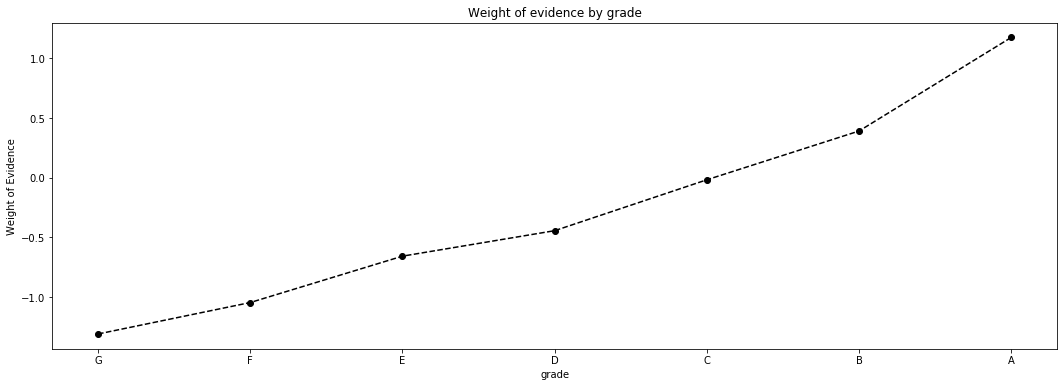

In [84]:
plot_by_woe(df_temp)

### Pre-processing discrete Vars : Creating dummy vars Part 1

In [85]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe,diff_prop_good,diff_Woe,IV
0,OTHER,148,0.790541,0.000208,117.0,31.0,0.000176,0.000660,-1.318955,NaN,NaN,inf
1,NONE,37,0.864865,0.000052,32.0,5.0,0.000048,0.000106,-0.790844,0.074324,0.528111,inf
2,RENT,284999,0.922417,0.401462,262888.0,22111.0,0.396553,0.470737,-0.171489,0.057552,0.619355,inf
3,OWN,69963,0.938224,0.098553,65641.0,4322.0,0.099016,0.092014,0.073340,0.015807,0.244829,inf
4,MORTGAGE,354755,0.942208,0.499723,334253.0,20502.0,0.504204,0.436482,0.144234,0.003984,0.070894,inf
5,ANY,1,1.000000,0.000001,1.0,0.0,0.000002,0.000000,inf,0.057792,inf,inf


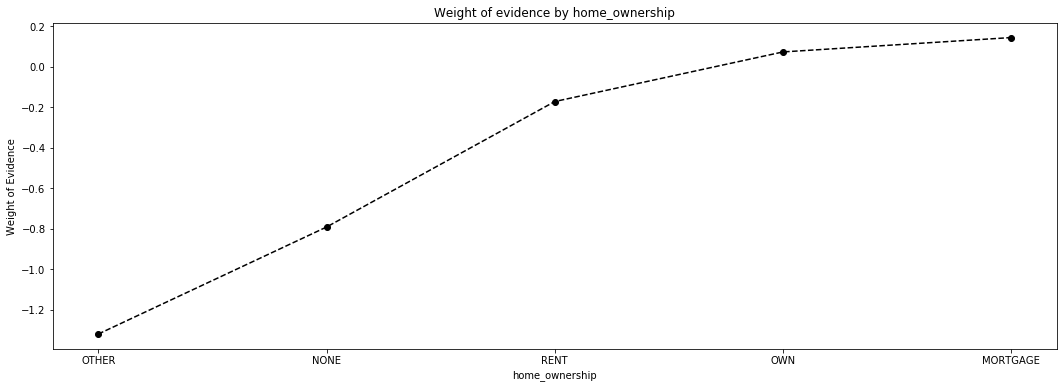

In [86]:
plot_by_woe(df_temp)

We will be combining underrepresented categories such as 'Home ownership'. Final dummy categories for OWN, MORTAGE & remaining categories

In [87]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

### Pre-processing discrete Vars : Creating dummy vars Part 2

In [88]:
df_inputs_prepr['addr_state'].unique()

array(['NH', 'CA', 'UT', 'MN', 'KY', 'MA', 'SC', 'KS', 'NJ', 'TX', 'OH',
       'IL', 'NY', 'LA', 'WA', 'FL', 'VA', 'NC', 'NV', 'AZ', 'OK', 'GA',
       'PA', 'TN', 'IN', 'MS', 'WI', 'CT', 'OR', 'MI', 'MO', 'CO', 'HI',
       'NM', 'SD', 'AL', 'MD', 'MT', 'AR', 'DE', 'WY', 'ME', 'VT', 'DC',
       'RI', 'ND', 'AK', 'NE', 'WV', 'IA', 'ID'], dtype=object)

In [89]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

C:\Users\Lenovo\.conda\envs\tensorflow_gpu\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,Woe,diff_prop_good,diff_Woe,IV
0,IA,13,0.769231,0.000018,10.0,3.0,0.000015,0.000064,-1.443169,NaN,NaN,inf
1,NV,9891,0.915277,0.013933,9053.0,838.0,0.013656,0.017841,-0.267309,0.146046,1.175861,inf
2,HI,3623,0.921060,0.005104,3337.0,286.0,0.005034,0.006089,-0.190306,0.005783,0.077002,inf
3,FL,48791,0.924371,0.068729,45101.0,3690.0,0.068033,0.078559,-0.143864,0.003311,0.046442,inf
4,AL,8987,0.924558,0.012659,8309.0,678.0,0.012534,0.014434,-0.141195,0.000186,0.002669,inf
5,NY,59395,0.925482,0.083666,54969.0,4426.0,0.082918,0.094228,-0.127869,0.000924,0.013326,inf
6,VA,21088,0.927637,0.029705,19562.0,1526.0,0.029508,0.032488,-0.096203,0.002155,0.031666,inf
7,NM,3956,0.927705,0.005573,3670.0,286.0,0.005536,0.006089,-0.095187,0.000068,0.001016,inf
8,LA,8527,0.928814,0.012012,7920.0,607.0,0.011947,0.012923,-0.078524,0.001110,0.016663,inf
9,NJ,26735,0.929119,0.037660,24840.0,1895.0,0.037470,0.040344,-0.073906,0.000305,0.004619,inf


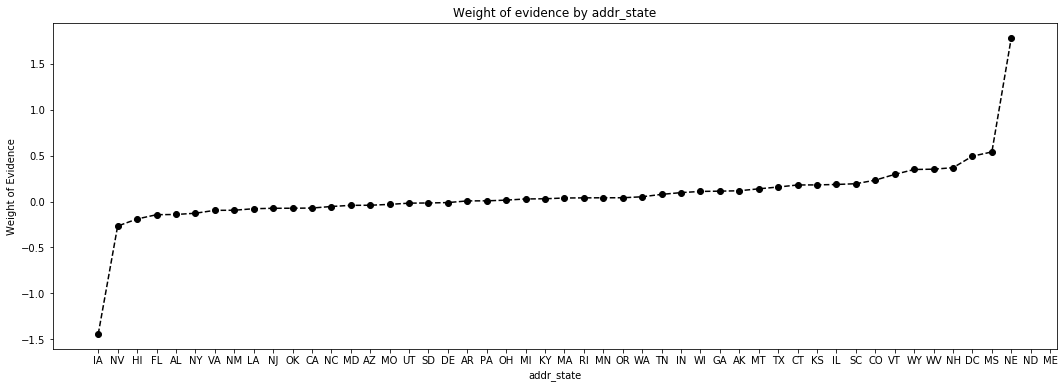

In [90]:
plot_by_woe(df_temp)

**Now we can decide that Which categories to break**

In [91]:
# We cannot see ND state here so initialise it with zero borrowers
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

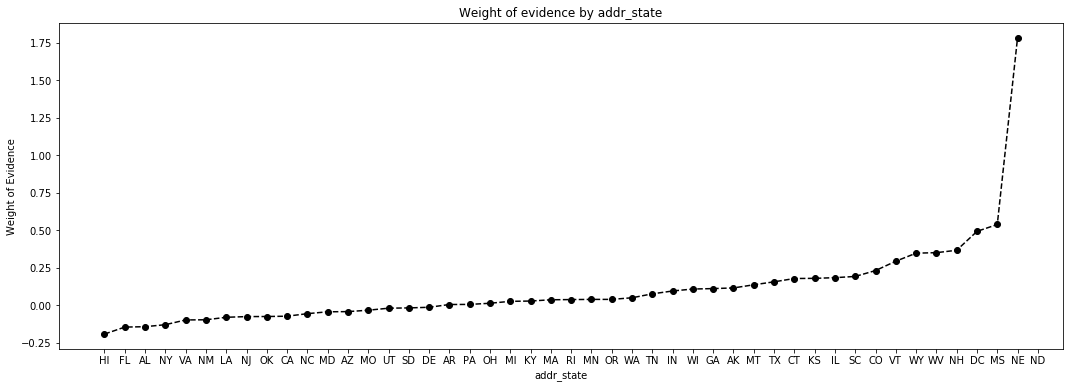

In [92]:
# we skip first & last two categories as they have either very large or very small values majorly due toless no of records
plot_by_woe(df_temp.iloc[2:-2, :])

**We place the states with no information in highest risk category**

We will group first & last 6 states as because of similar behaviours

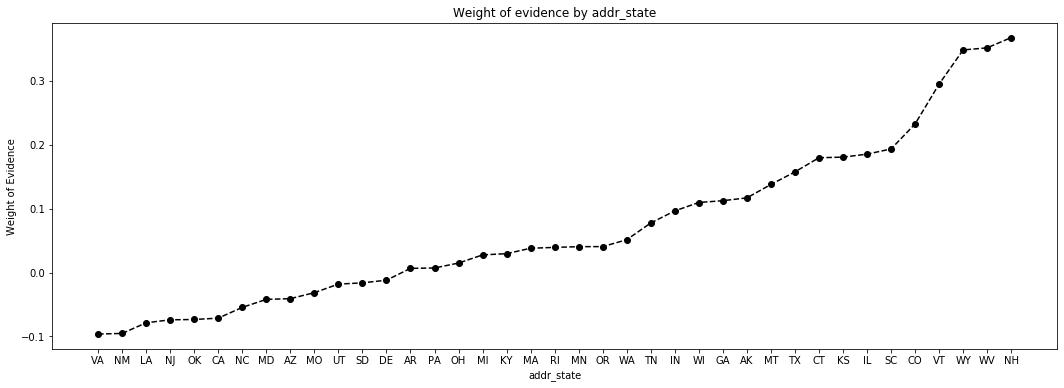

In [93]:
plot_by_woe(df_temp.iloc[6:-6, :])

this is what a typical Woe graph must look like. States with max no of borrowers will be kept in separate categories

In [94]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'],
                                                         df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'],
                                                         df_inputs_prepr['addr_state:HI'],df_inputs_prepr['addr_state:AL']])

In [95]:
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

In [96]:
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                         df_inputs_prepr['addr_state:MO'],
                                                         df_inputs_prepr['addr_state:LA'],
                                                         df_inputs_prepr['addr_state:MD'],
                                                         df_inputs_prepr['addr_state:NC']])

In [97]:
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                         df_inputs_prepr['addr_state:AZ'],
                                                         df_inputs_prepr['addr_state:NJ']])

In [98]:
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                         df_inputs_prepr['addr_state:PA'],
                                                         df_inputs_prepr['addr_state:OH'],
                                                         df_inputs_prepr['addr_state:MN']])

In [99]:
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                         df_inputs_prepr['addr_state:DE'],
                                                         df_inputs_prepr['addr_state:SD'],
                                                         df_inputs_prepr['addr_state:IN']])

In [100]:
df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                         df_inputs_prepr['addr_state:OR']])

In [101]:
df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])

In [102]:
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

In [103]:
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                         df_inputs_prepr['addr_state:CO'],
                                                         df_inputs_prepr['addr_state:VT'],
                                                         df_inputs_prepr['addr_state:AK'],
                                                         df_inputs_prepr['addr_state:MS']])

In [106]:
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                         df_inputs_prepr['addr_state:WY'],
                                                         df_inputs_prepr['addr_state:ID'],
                                                         df_inputs_prepr['addr_state:DC'],
                                                         df_inputs_prepr['addr_state:ME']])

## Homework
There are three discrete variables left for preprocessing:

· ‘verification_status’;

· ‘purpose’;

· ‘initial_list_status’.

Your task in this homework is to examine weight of evidence for these three variables and determine the categories for each of them as dummy variables for the probability of default (PD) model.

For each of the three variables:

1. Run the ‘woe_discrete’ function with the following arguments: the ‘df_inputs_prepr’ dataframe, the respective independent variable, and the ‘df_targets_prepr’ dataframe. Display the dataframe with results.

2. Run the ‘plot_by_woe’ function with the dataframe with results as an argument. Display the chart with weights of evidence by original categories of the independent variable.

3. Examine the chart and the dataframe with results. Decide whether the variable should be used for the PD model. Decide what categories of the independent variable we should have as dummy variables for the PD model and create them, if necessary.

4. Decide which one should be the reference category and include the names of the dummy variables and the name of the reference category in the respective lists in the spreadsheet files.